## Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import speckleret

## Load pre-computed example speckle

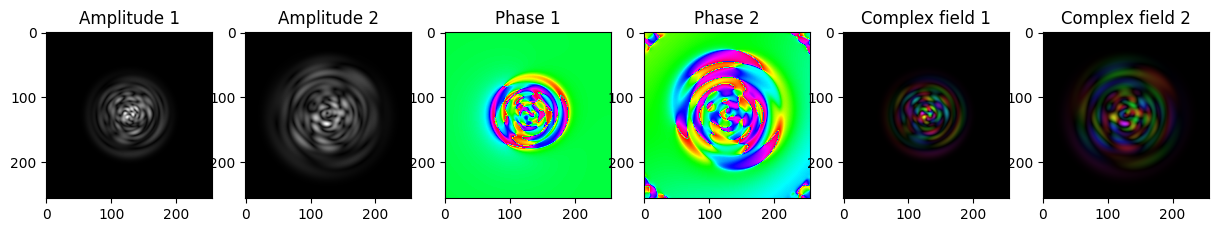

In [27]:
field = np.load('../imports/grin_speckle_example.npy')
ft = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft)

## Generate a shifted field

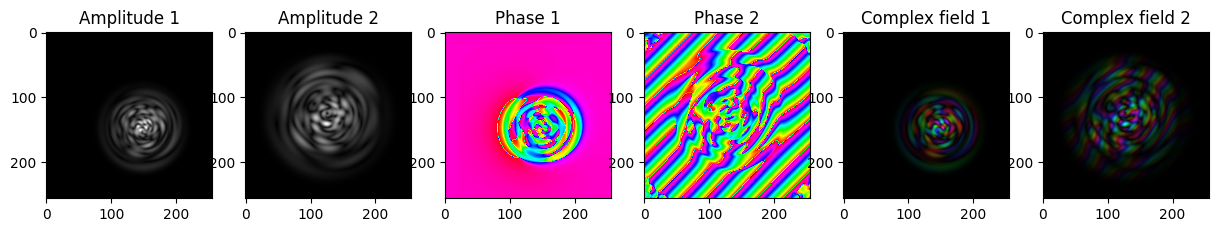

In [28]:
shift = (20,20)
shifted_field = np.roll(field, shift=shift, axis=(0,1))
shifted_ft = speckleret.transforms.fourier_transform(shifted_field, pad=2)
_ = speckleret.plots.compare_complex_fields(shifted_field, shifted_ft)

## Generate and visualize support

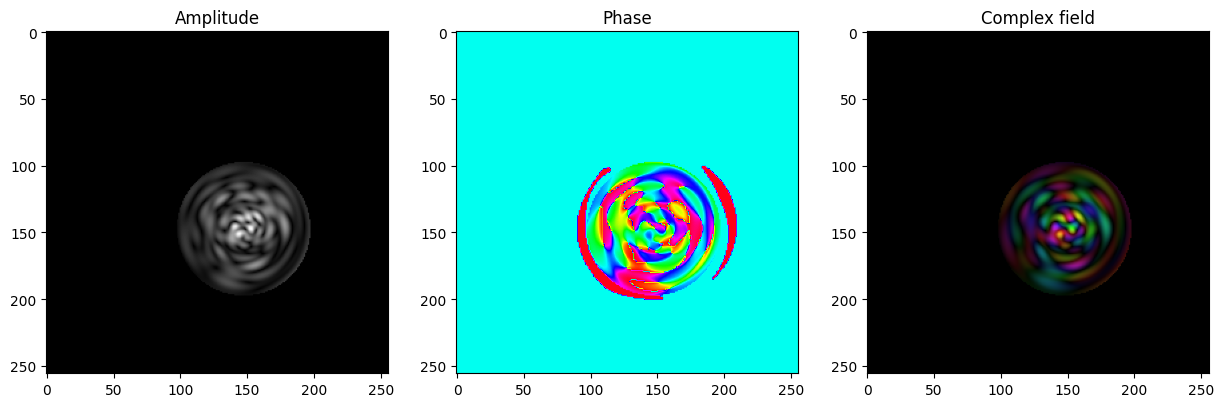

In [29]:
support = speckleret.supports.disk_support(shifted_field, radius=50, offsets=shift)
supported_field = shifted_field * support
_ = speckleret.plots.complex_imshow(supported_field)

## Run retrieval and show convergence and metrics

In [30]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(shifted_field), np.abs(ft)), support, pad=2, max_iter=2, max_er_iter=300, max_hio_iter=100)

1 / 2
2 / 2


Quality: 0.016450656217279484
Pearson: 0.9999999999999999


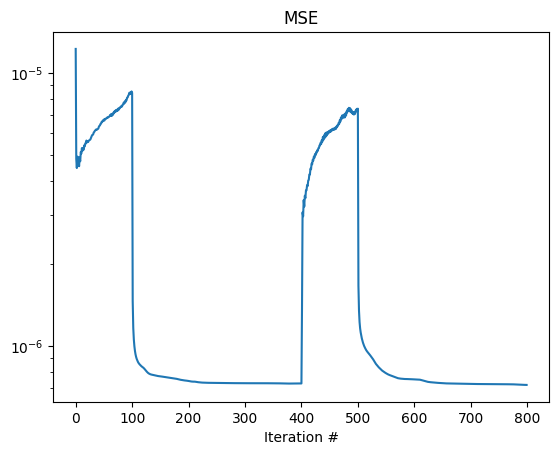

In [31]:
print(f"Quality: {speckleret.metrics.quality(y_hat, shifted_field)}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat, shifted_field)}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

## Compare retrieved field with initial field

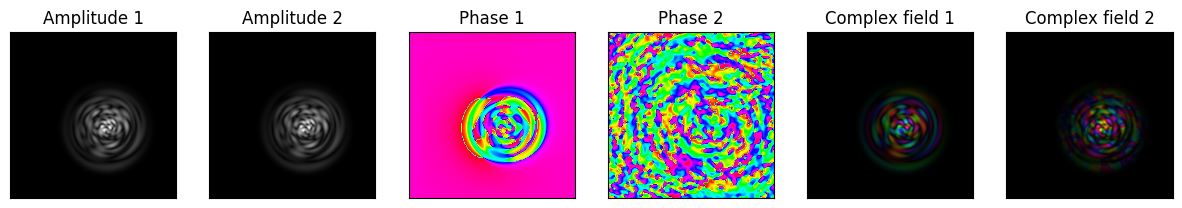

In [32]:
_ = speckleret.plots.compare_complex_fields(shifted_field, y_hat, remove_ticks=True)